In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
#import datatime as dt

In [3]:
# Reading the data on which analysis needs to be done
retail=pd.read_csv("OnlineRetail.csv")

In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
retail.shape

(541909, 8)

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [10]:
# Calculating the Missing values
df_null=round(100*retail.isna().sum()/len(retail),2)

In [11]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [12]:
# dropping rows having Missing Values
retail=retail.dropna()

In [13]:
retail.shape

(406829, 8)

In [14]:
# Changing datatype of customerID
retail['CustomerID']=retail['CustomerID'].astype("str")

In [15]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

# Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
#### R (Recency): Number of days since last purchase
#### F (Frequency): Number of tracsactions
#### M (Monetary): Total amount of transactions (revenue contributed)

In [17]:
# New Attribute: Monetary
retail['Amount']=retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()

In [19]:
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [21]:
# New Attribute: Frequency
rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()

In [23]:
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [25]:
# Merge two DataFrames
rfm=pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [46]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [47]:
# Compute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-10 17:19:00')

In [48]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [49]:
# Compute last transaction date to get the recency of customers
rfm_p=retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00
2,12348.0,76 days 04:06:00
3,12349.0,19 days 07:28:00
4,12350.0,311 days 01:18:00


In [50]:
# Extract number of days only

rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [51]:
# Merge tha dataframes to get the final RFM dataframe

rfm=pd.merge(rfm,rfm_p,on='CustomerID',how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


Text(0.5, 0, 'Attributes')

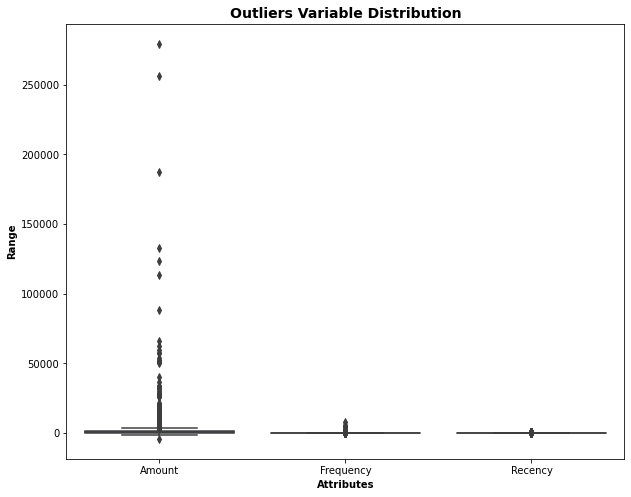

In [52]:
# Outlier Analysis of Amount,Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.figure(figsize=(10,8))
sns.boxplot(data=rfm[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [53]:
# Removing outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

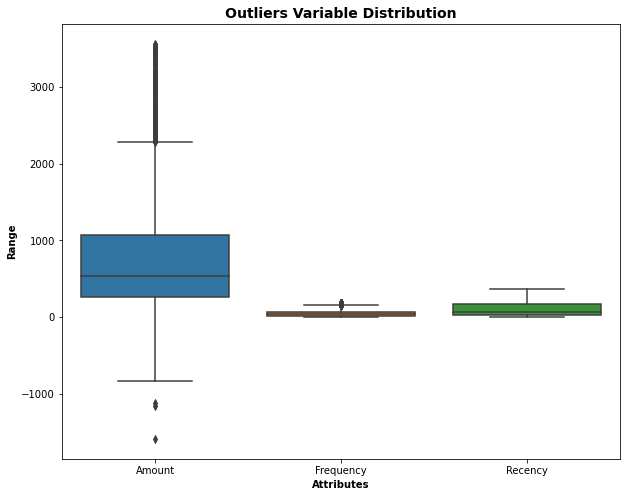

In [54]:
attributes = ['Amount','Frequency','Recency']
plt.figure(figsize=(10,8))
sns.boxplot(data=rfm[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [56]:
# Scaling Data
rfm_df=rfm[['Amount','Frequency','Recency']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_df)

In [57]:
rfm_df_scaled=pd.DataFrame(rfm_scaled,columns=rfm_df.columns)

In [58]:
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.333768
1,1.355840,-0.393805,-0.284479
2,1.302571,0.594439,-0.881439
3,-0.607471,-0.723220,2.176673
4,1.017853,1.112091,-0.315898


In [60]:
# Building the Model
from sklearn.cluster import KMeans

In [61]:
kMeans=KMeans(n_clusters=4,max_iter=50)
kMeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [62]:
kMeans.labels_

array([2, 3, 3, ..., 0, 0, 3])

# Finding Optimal number of Clusters 

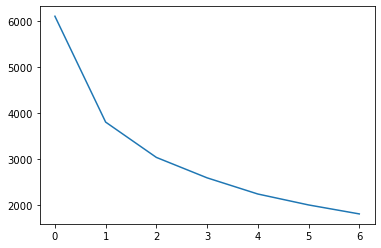

In [63]:
# Elbow Method/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [64]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [66]:
kmeans.labels_

array([0, 2, 1, ..., 2, 2, 1])

In [71]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,326,0
2,12348.0,1797.24,31,76,2
3,12349.0,1757.55,73,19,1
4,12350.0,334.40,17,311,0
5,12352.0,1545.41,95,73,1
...,...,...,...,...,...
4366,18278.0,173.90,9,74,2
4367,18280.0,180.60,10,160,0
4368,18281.0,80.82,7,4,2
4369,18282.0,176.60,13,93,2


In [78]:
rfm['Cluster_Id'].value_counts()

2    1851
0     992
1     786
Name: Cluster_Id, dtype: int64

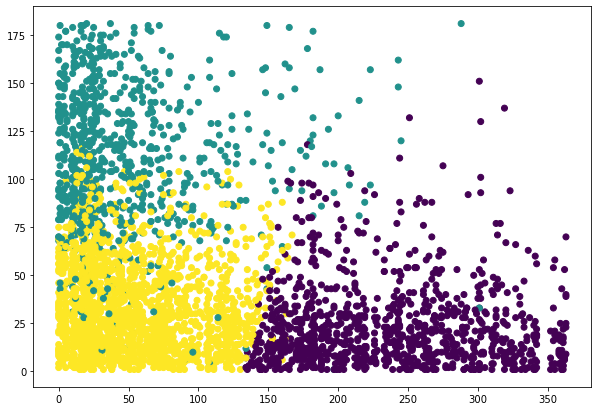

In [73]:
plt.figure(figsize=(10,7))
plt.scatter(rfm['Recency'],rfm['Frequency'],c=kmeans.labels_)
plt.show()

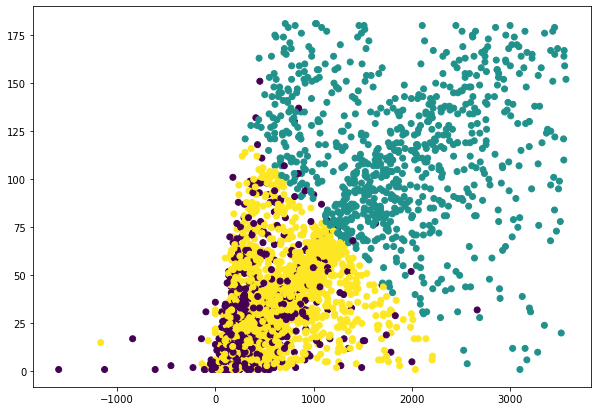

In [74]:
plt.figure(figsize=(10,7))
plt.scatter(rfm['Amount'],rfm['Frequency'],c=kmeans.labels_)
plt.show()

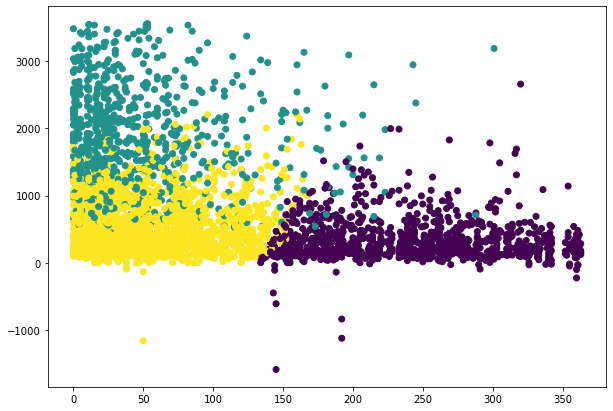

In [75]:
plt.figure(figsize=(10,7))
plt.scatter(rfm['Recency'],rfm['Amount'],c=kmeans.labels_)
plt.show()